In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

In [5]:
df = pd.read_csv('loan_approval.csv')

In [17]:
df.sample(10)

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
1026,Anthony Rodriguez,Juanstad,39038,728,17185,20,50.0,False
465,Laura Bennett,Diazland,103792,829,17487,24,95.0,True
145,Mark Hogan,West Williamport,114259,772,30616,2,75.0,True
1786,Kara Sanders MD,Comptontown,45292,752,12397,13,65.0,True
1104,Cheryl Newman,Port Sarahchester,129374,431,42698,24,50.0,False
1771,Joshua Shepard,Port Michaeltown,103584,645,16574,31,70.0,True
705,Samuel Rhodes,New Prestonfort,118777,625,40529,38,65.0,True
1838,Jillian Stewart,New Josephberg,54878,411,19578,5,35.0,False
14,Mark Lynch,West Kathryn,41395,843,1037,38,80.0,True
424,Tina Taylor,Smithton,38981,743,39346,30,60.0,True


In [7]:
df.shape

(2000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [9]:
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['name'].nunique()

2000

In [13]:
df['city'].nunique()

1882

In [14]:
df.columns

Index(['name', 'city', 'income', 'credit_score', 'loan_amount',
       'years_employed', 'points', 'loan_approved'],
      dtype='object')

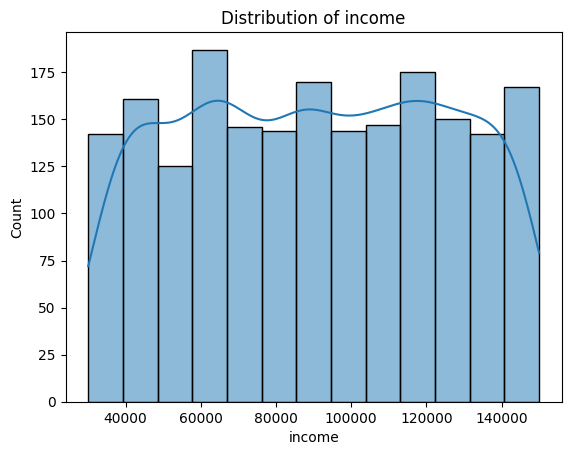

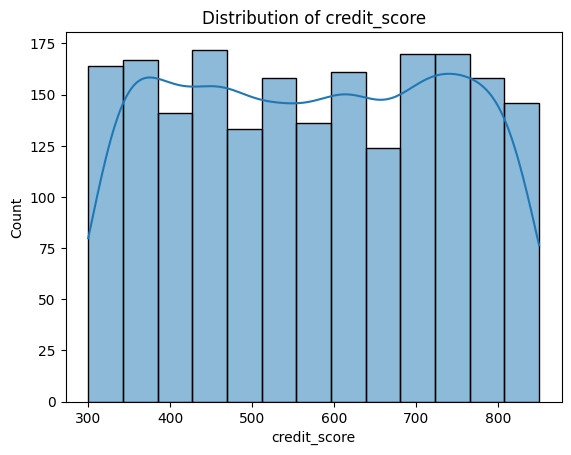

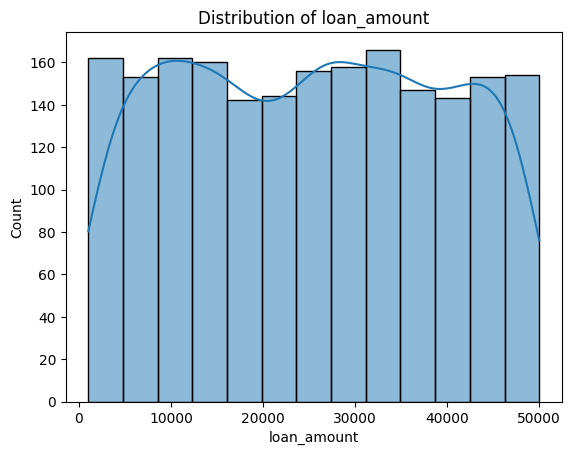

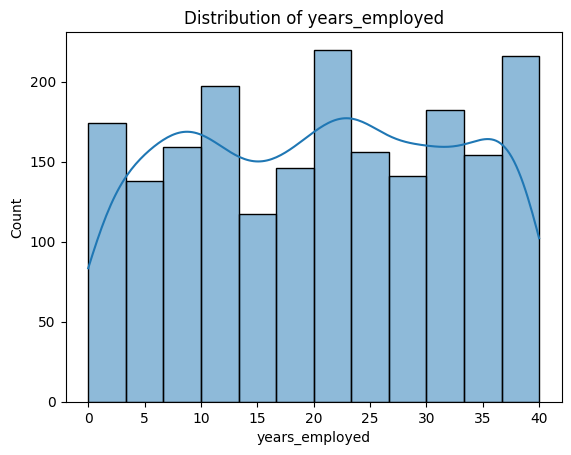

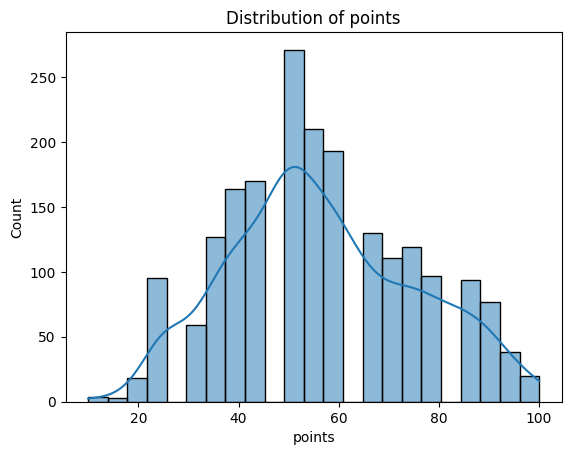

In [16]:
columns = ['income', 'credit_score', 'loan_amount', 'years_employed', 'points']

for col in columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [24]:
df = df.drop(columns=['name', 'city'])

In [27]:
df.head()

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,False
1,44592,729,15446,28,55.0,False
2,33278,584,11189,13,45.0,False
3,127196,344,48823,29,50.0,False
4,66048,496,47174,4,25.0,False


In [28]:
df = df.astype('int')

In [31]:
X = df.drop('loan_approved', axis=1)
y = df['loan_approved']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [36]:
X_scaled

array([[ 0.67356517, -1.15213351,  1.01307605,  0.55703384, -0.35849655],
       [-1.33396099,  0.96591929, -0.69435822,  0.64196048, -0.09016081],
       [-1.66210036,  0.06263207, -0.99406743, -0.63193914, -0.62683229],
       ...,
       [-1.41038376,  1.17772457, -0.60241079, -1.31135227,  0.17817493],
       [ 1.40478753, -1.33279095, -0.08994113,  1.23644697, -0.09016081],
       [-1.43268703, -0.57278377,  0.42865365, -1.22642563, -1.96851098]])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [43]:
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=9),
    'Support Vector Machine': SVC(C=0.5, kernel='rbf')
}

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy Score for {name}: {accuracy}')

Accuracy Score for Logistic Regression: 0.9575
Accuracy Score for Decision Tree: 1.0
Accuracy Score for K-Nearest Neighbors: 0.98
Accuracy Score for Support Vector Machine: 0.9875


In [48]:
for name, model in models.items():
    print(f"Training score of {name}: {model.score(X_train, y_train)}")
    print(f"Test score of {name}: {model.score(X_test, y_test)}")
    print("----------------------------------------------")


Training score of Logistic Regression: 0.974375
Test score of Logistic Regression: 0.9575
----------------------------------------------
Training score of Decision Tree: 1.0
Test score of Decision Tree: 1.0
----------------------------------------------
Training score of K-Nearest Neighbors: 0.990625
Test score of K-Nearest Neighbors: 0.98
----------------------------------------------
Training score of Support Vector Machine: 0.991875
Test score of Support Vector Machine: 0.9875
----------------------------------------------
